In [1]:

#imoirt packages
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

SCROLL_PAUSE_TIME = 1
url= "https://www.linkedin.com/jobs/search/?keywords=Ci%C3%AAncia%20De%20Dados&location=Brasil&locationId=&geoId=106057199&f_TPR=&position=1&pageNum=0"

#set the optionsof the driver
options = Options()
options.headless = True
driver = webdriver.Chrome(ChromeDriverManager().install())


driver.get(url)

time.sleep(SCROLL_PAUSE_TIME)

#get the button to close the pop-up
button =  driver.find_elements(By.XPATH,'//button[@class="cta-modal__dismiss-btn absolute top-2 right-2 hover:cursor-pointer focus:outline focus:outline-2 focus:outline-color-action"]')
button[0].click()


#start timer
start_time = time.time()
# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
flag = 0
#loop until there is no more new jobs in the page
while (flag == 0):

    # Scroll up to refresh new jobs
    driver.execute_script("window.scrollTo(0, 100);")
    time.sleep(SCROLL_PAUSE_TIME)
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        time.sleep(SCROLL_PAUSE_TIME)
        #search in the html code if there is a button to show more jobs
        button =  driver.find_elements(By.XPATH,'//button[@class="infinite-scroller__show-more-button infinite-scroller__show-more-button--visible"]')
        if(button):
            #click the button to show more jobs
            button[0].click()
        else:
            flag = 1
    #get how long the scrap are executing
    time_spent = time.time() - start_time  

    #get out of loop if time > 10min
    if time_spent > 600:
        flag = 1   
    last_height = new_height


elements = driver.find_elements(By.XPATH,'//a[@class="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]"]')

urls = [e.get_attribute("href") for e in elements]


elements2 = driver.find_elements(By.XPATH,'//a[@data-tracking-control-name="public_jobs_jserp-result_search-card"]')
urls.append(e.get_attribute("href") for e in elements2)
#print(len(urls))

elements = driver.find_elements(By.XPATH,'//span[@class="sr-only"]')
job_titles = [e.text for e in elements]
#print(job_titles)


"""html = driver.page_source

with open('data/html_request.html', 'w',encoding="utf-8") as f:
    f.write(str(html))
"""


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/103.0.5060.134/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\User\.wdm\drivers\chromedriver\win32\103.0.5060.134]
C:\Users\User\AppData\Local\Temp\ipykernel_14924\3996893742.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


'html = driver.page_source\n\nwith open(\'data/html_request.html\', \'w\',encoding="utf-8") as f:\n    f.write(str(html))\n'

In [22]:
data_science_terms = ["cientista","dado","analista","bi","analytics","data","science","ai","big data","machine learning","scientist"]

data_science_job_titles = []

for title in job_titles:
    flag = 0
    for term in data_science_terms:
        if term in title.lower():
            if flag == 0:
                data_science_job_titles.append(title)
                flag = 1

print(len(set(data_science_job_titles)))



442


In [2]:
requiriments = {"Python": 0,
"SQL":0,
"Excel":0,
" R ":0,
"modelagem de dados":0,
"probabilidade":0,
"estatística":0,
"Machine Learning":0,
"Power BI":0,
"Inglês":0, 
"ETL":0,
"Linux":0,
"MongoDB" :0,
"Elasticsearch":0,
"AWS":0, 
"Tableau":0,
"Oracle":0,
"Scala":0,
"SAS" :0,
"Kagle":0,
"Shiny":0,
"GCP":0,
"MLOP":0,
"Data Bricks":0,
"Spark":0,
"Pentaho":0,
" C ":0,
"C++":0,
"NLP":0,
"Redshift":0,
"VBA":0,
"Azure":0,
"Data Science":0
}

In [3]:
len(urls)

939

In [15]:
#start driver
driver = webdriver.Chrome(ChromeDriverManager().install())
#list of urls that got some error
urls_error = []
#loop for all urls jobs
for url in urls:
    
    time.sleep(3)
    driver.get(url)
    
    #if there is a job description search for the requiriment in text
    try:
        job_description = driver.find_element(By.XPATH,'//div[@class="show-more-less-html__markup show-more-less-html__markup--clamp-after-5"]')
        text = job_description.text
        for requiriment in requiriments.keys():
            if requiriment in text:
                requiriments[requiriment] += 1
    #urls that gave error
    except:
        urls_error.append(url)


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\User\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache
C:\Users\User\AppData\Local\Temp\ipykernel_14924\2474899797.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [16]:
urls = urls_error
len(urls)

0

In [17]:
with open("data/requiriments_results.txt", 'w') as f: 
    for key, value in requiriments.items(): 
        f.write('%s:%s\n' % (key, value))

In [24]:
requiriments=dict(sorted(requiriments.items(), key=lambda item: item[1],reverse=True))
requiriments

{'SQL': 94,
 'Python': 62,
 'Inglês': 62,
 'Excel': 61,
 'estatística': 58,
 'Power BI': 48,
 'AWS': 41,
 'Machine Learning': 40,
 'ETL': 33,
 'Azure': 30,
 'SAS': 22,
 'Oracle': 21,
 'Tableau': 18,
 'Spark': 18,
 'Data Science': 18,
 'modelagem de dados': 15,
 'Linux': 15,
 'GCP': 12,
 ' R ': 9,
 'VBA': 7,
 'MongoDB': 5,
 'Scala': 4,
 'C++': 4,
 'Redshift': 4,
 ' C ': 3,
 'NLP': 3,
 'Data Bricks': 2,
 'Pentaho': 2,
 'probabilidade': 0,
 'Elasticsearch': 0,
 'Kagle': 0,
 'Shiny': 0,
 'MLOP': 0}

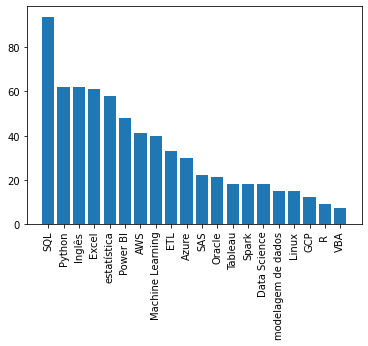

In [37]:
import matplotlib.pyplot as plt

names = list(requiriments.keys())[:20]
values = list(requiriments.values())[:20]

plt.bar(range(len(names)),values,tick_label=names)
plt.title("Top 20 requisitos das vagas de cietista de dados")
plt.xticks(rotation = 90)
plt.show()

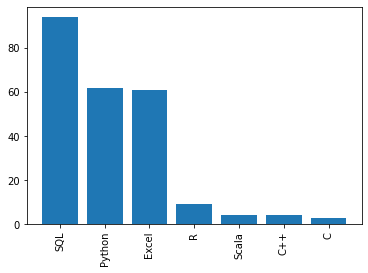

In [39]:
languages = ["SQL","Python","Excel","R","Scala","C++","C"]
languages_values = [requiriments["SQL"],requiriments["Python"],requiriments["Excel"],requiriments[" R "],requiriments["Scala"],requiriments["C++"],requiriments[" C "]]

plt.bar(range(len(languages)),languages_values,tick_label=languages)
plt.xticks(rotation=90)
plt.show()

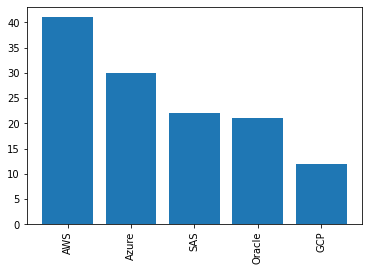

In [42]:
plataforms = ["AWS","Azure","SAS","Oracle","GCP"]
plataforms_values = [requiriments["AWS"],requiriments["Azure"],requiriments["SAS"],requiriments["Oracle"],requiriments["GCP"]]

plt.bar(range(len(plataforms)),plataforms_values,tick_label=plataforms)
plt.xticks(rotation=90)
plt.show()